# Cluster Analysis

In [14]:
# Basic Imformation
#  1] Grouping data points together based on similiarities among them and difference from others
#  2] Unsupervised Learning
#  3] Pros
#       1. Simple to understand
#       2. Fast to cluster
#       3. Widely Available
#       4. Easy to implement
#       5. Always yeild a result
#     Cons -(remedies)
#       1. We need to pick K  (The Elbow Method)
#       2. Sensitive to initialization  (K-Means++)
#       3. Sensitive to outliers  (Remove them beforehand)
#       4. Produces spherical solutions
#       5. Standardization
#  4] Standardization
#       If one variable is inherently more important than other, this must not be used
#       if not, use standardiation otherwise , you may get baised clusters
    

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

### Take data

In [16]:
raw_data = pd.read_csv('iris_dataset.csv')
raw_data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Plot the data

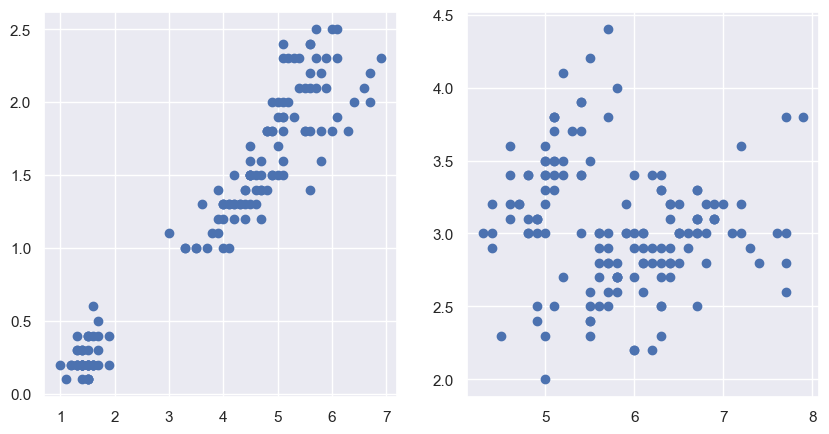

In [17]:
f ,(ax1,ax2) = plt.subplots(1,2,sharey = False,figsize= (10,5))
ax1.scatter(raw_data['petal_length'],raw_data['petal_width'])
ax2.scatter(raw_data['sepal_length'],raw_data['sepal_width'])

In [18]:
# Let's take the sepal comparison
data = raw_data.iloc[:,0:2]
data

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


### Standardization 
from intro note, we know as both sepal, length and Width are significant , we must standardize them

In [19]:
from sklearn import preprocessing
scaled_data= data.copy()
scaled_data['sepal_length'] = preprocessing.scale(data['sepal_length'])
scaled_data['sepal_width'] = preprocessing.scale(data['sepal_width'])
#plt.scatter(scaled_data['sepal_length'],scaled_data['sepal_width'])
scaled_data

,sepal_length,sepal_width
0,-0.900681,1.032057
1,-1.143017,-0.124958
2,-1.385353,0.337848
3,-1.506521,0.106445
4,-1.021849,1.263460
...,...,...
145,1.038005,-0.124958
146,0.553333,-1.281972
147,0.795669,-0.124958
148,0.432165,0.800654


### The Elbow method : To know the no. of clusters to be made

c:\Users\satha\anaconda3\envs\py3-TF2\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\satha\anaconda3\envs\py3-TF2\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\satha\anaconda3\envs\py3-TF2\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\satha\anaconda3\envs\py3-TF2\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to ha

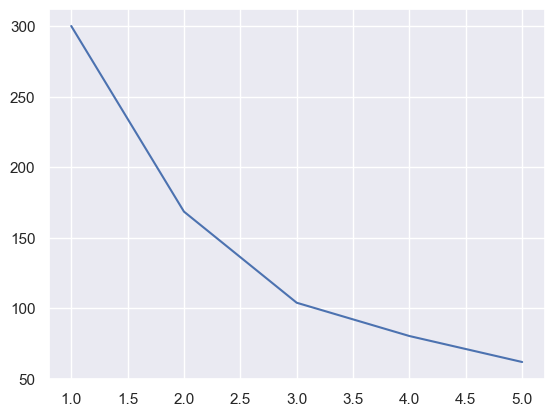

In [20]:
WCSS = []
array = range(1,6)
for i in range(1,6):
    kmeans_i = KMeans(i)
    kmeans_i.fit(scaled_data)
    WCSS.append(kmeans_i.inertia_)
plt.plot(array,WCSS)


c:\Users\satha\anaconda3\envs\py3-TF2\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\satha\anaconda3\envs\py3-TF2\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\satha\anaconda3\envs\py3-TF2\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\satha\anaconda3\envs\py3-TF2\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to ha

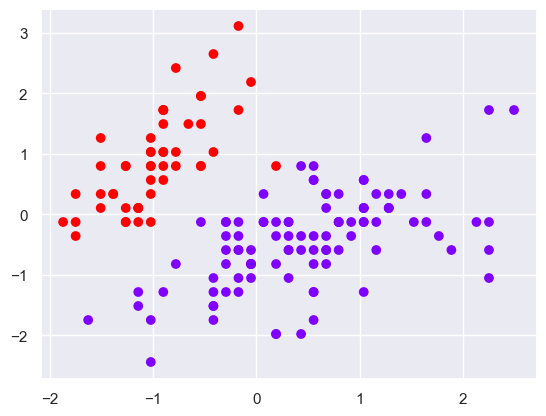

In [21]:
# from the graph 2 or 3 clusters are the best
# So let us produce scatter plot for both to check which one is optimum
# case 1: 2 Clusters
kmeans_2 = KMeans(2)
kmeans_2.fit(scaled_data)
cluster_2 = kmeans_2.fit_predict(scaled_data)
plt.scatter(scaled_data['sepal_length'],scaled_data['sepal_width'],c = cluster_2,cmap='rainbow')

c:\Users\satha\anaconda3\envs\py3-TF2\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\satha\anaconda3\envs\py3-TF2\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\satha\anaconda3\envs\py3-TF2\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\satha\anaconda3\envs\py3-TF2\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to ha

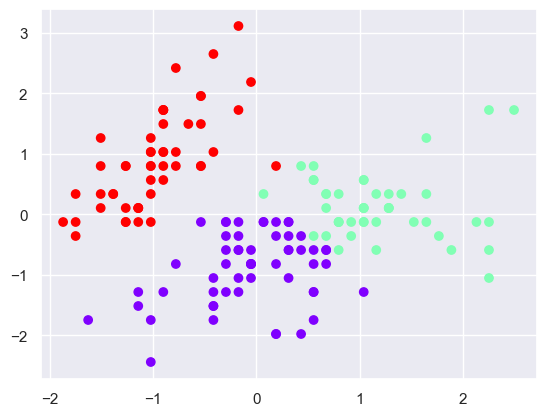

In [22]:
# case 2: 3 Clusters
kmeans_3 = KMeans(3)
kmeans_3.fit(scaled_data)
cluster_3 = kmeans_3.fit_predict(scaled_data)
plt.scatter(scaled_data['sepal_length'],scaled_data['sepal_width'],c = cluster_3,cmap='rainbow')

### Solution
Lets check the actual solution

In [23]:
Solution_data = pd.read_csv('iris_with_answers.csv')
Solution_data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [24]:
Solution_data['species_index'] = Solution_data['species'].map({'setosa':0,'versicolor':1,'virginica':2})

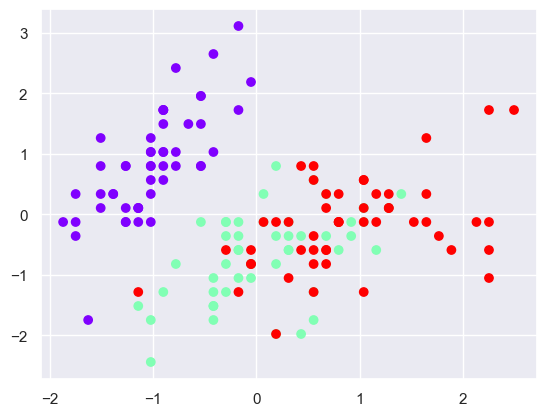

In [25]:
plt.scatter(preprocessing.scale(Solution_data['sepal_length']),preprocessing.scale(Solution_data['sepal_width']),c = Solution_data['species_index'],cmap='rainbow')

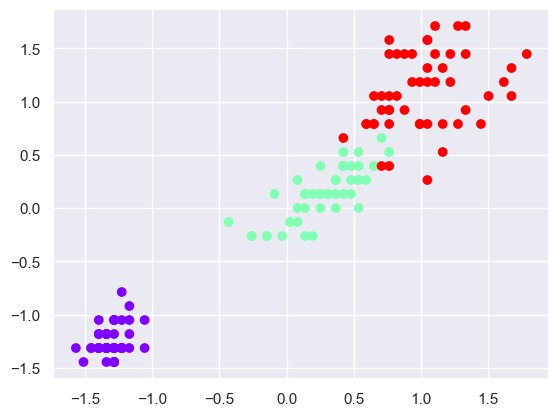

In [26]:
# Looking at the first graph it seems like the clustering solution is much more intertwined than what we imagined (and what we found before)
# Let's check actual solution with petal info
plt.scatter(preprocessing.scale(Solution_data['petal_length']),preprocessing.scale(Solution_data['petal_width']),c = Solution_data['species_index'],cmap='rainbow')

### Further clarifications
In fact, if you read about it, the original dataset has 3 sub-species of the Iris flower. Therefore, the number of clusters is 3.

This shows us that:

the Eblow method is imperfect (we might have opted for 2 or even 4)
k-means is very useful in moments where we already know the number of clusters - in this case: 3
biology cannot be always quantified (or better).. quantified with k-means! Other methods are much better at that
Finally, you can try to classify them (instead of cluster them, now that you have all the data)!